#  packages


In [172]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNBasic, Reader
from surprise import Dataset,accuracy
from surprise.model_selection import train_test_split
import time

# Reading the csv files 

In [173]:
movies_data = pd.read_csv("movies.csv")
ratings_data = pd.read_csv("ratings.csv")

# Displaying dataset


In [174]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [175]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Preprocessing

In [176]:
Rated_movies=pd.merge(movies_data,ratings_data,how='outer',on='movieId')
Rated_movies.head()
# displaying the head of the resulted dataframe after merging

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [177]:
new_dataset = pd.pivot_table(Rated_movies,values='rating',index=['movieId','title'],columns='userId')
new_dataset.head()

,userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,Jumanji (1995),NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,Grumpier Old Men (1995),4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,Waiting to Exhale (1995),NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
new_dataset.fillna(0,inplace=True) #filling the null values with zeros
new_dataset.head()

,userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,Jumanji (1995),0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,Grumpier Old Men (1995),4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,Waiting to Exhale (1995),0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
User_voted_number = Rated_movies.groupby('movieId')['rating'].agg('count')  
movies_voted_number = Rated_movies.groupby('userId')['rating'].agg('count')
#splitting movies_data data based on the number of rating users
#splitting users data based on the number of rated movies_data

# visualization

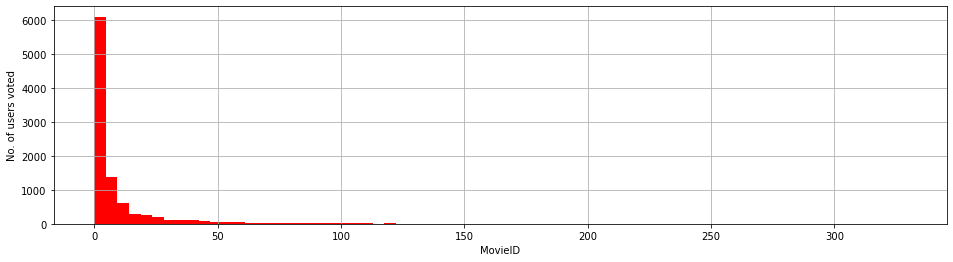

In [180]:
ax = plt.subplots(1,1,figsize=(16,4))
User_voted_number.hist(bins = 70,color="red")
plt.xlabel('MovieID')
plt.ylabel('No. of users voted')
plt.show()

In [181]:
new_dataset = new_dataset.loc[User_voted_number[User_voted_number > 5].index,:] #filtering movies_data
#removing movies_data that have been rated by 5 users only or less

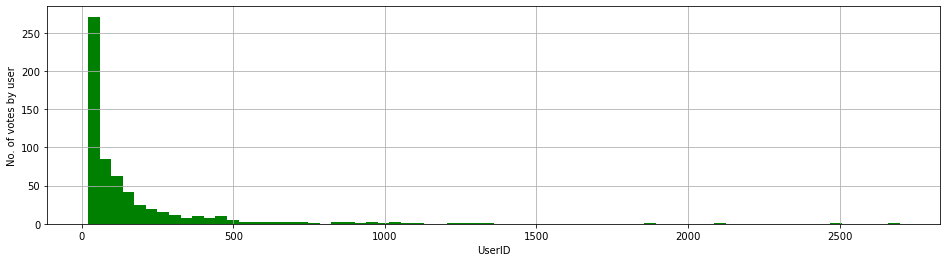

In [182]:
ax = plt.figure(figsize=(16,4))
movies_voted_number.hist(bins = 70,color="green")
plt.xlabel('UserID')
plt.ylabel('No. of votes by user')
plt.show()

In [183]:
new_dataset=new_dataset.loc[:,movies_voted_number[movies_voted_number > 15].index] #filtering users
#removing users that have rated 15 movies_data or less

# Removing sparsity


In [184]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size)) #sparsity = amount of zeros in an array
csr_sample = csr_matrix(sample)
csr_data = csr_matrix(new_dataset.values)
new_dataset.reset_index(inplace=True) #Adding new sequential index to "new_dataset" values after removing sparsity


# get_recommended_movies function

In [186]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [187]:
def get_recommended_movies(movie_name):
    list_of_movies = new_dataset[new_dataset['title'].str.contains(movie_name,False)]
    movies_number_to_recommend = 10   #as we will need 10 similar movies_data
    
    
    #to return the title of the required movie (incase sensitivity)
    if len(list_of_movies): #if the list is not empty
        #if the list contains more than 1 movie
            #display the matching results with their indices to let the user choose the required movie
        if len(list_of_movies)!=1: 
            for movie in range(0 , len(list_of_movies)): 
                print(str(movie)  +'===>>' + list_of_movies.iloc[movie]['title'])
            index = input('Enter the index of the Movie you need ')
            if(int(index) > len(list_of_movies)-1):
                return 'invalid input'
            elif int(index) <0 or index=='':
                
                return 'invalid input'
        else:
            index = 0
        
        movie_index= list_of_movies.iloc[int(index)]['movieId'] #gets the ID of the first matching movie title
        print(movie_index)
        movie_index = new_dataset[new_dataset['movieId'] == movie_index].index[0] 
        distances , indices = knn.kneighbors(csr_data[movie_index],n_neighbors=movies_number_to_recommend+1)    
        reccommended_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        #creating a list of recommended movies_data indices and a list of distances to the entered movie
        recommend_df = [] #initializing a new list of recommended movies_data
        for i in reccommended_movie_indices:
            movie_index = new_dataset.iloc[i[0]]['movieId'] #movie ID of recommended movies_data
            index = movies_data[movies_data['movieId'] == movie_index].index
            recommend_df.append({'Title':movies_data.iloc[index]['title'].values[0],'Distance':i[1]})
            #Displaying the title of recommended movies_data and the distance between them and the entered movie
        recommend_df.reverse()
        df = pd.DataFrame(recommend_df,index=range(1,movies_number_to_recommend+1))
        
        #plot a dataframe "df" containing the "recommend_df" list
        df.plot(x ='Title', y='Distance', kind = 'bar',figsize=(20,7))
        plt.show()
        return df
    else:
        return "No movies_data found. Please check your input"

 # display 10 most similar movies based on the user's rating

Enter movie nameiron
0===>>Man in the Iron Mask, The (1998)
1===>>Iron Giant, The (1999)
2===>>Iron Eagle (1986)
3===>>Iron Man (2008)
4===>>Iron Man 2 (2010)
5===>>Iron Man 3 (2013)
Enter the index of the Movie you need 5
102125


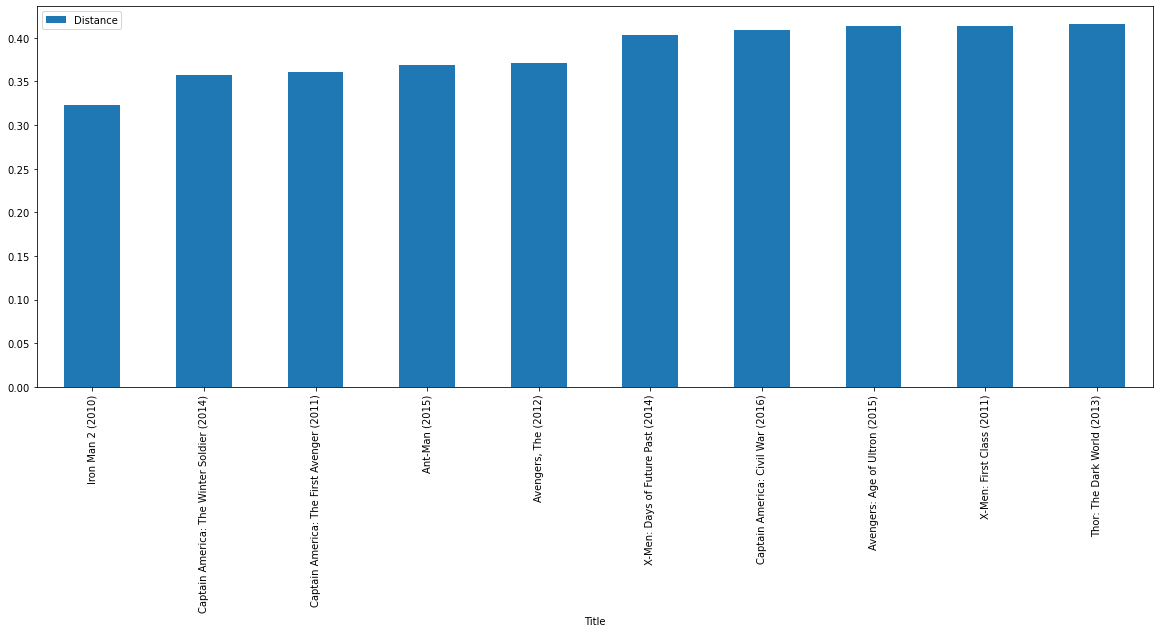

,Title,Distance
1,Iron Man 2 (2010),0.322434
2,Captain America: The Winter Soldier (2014),0.357393
3,Captain America: The First Avenger (2011),0.360931
4,Ant-Man (2015),0.368874
5,"Avengers, The (2012)",0.371652
6,X-Men: Days of Future Past (2014),0.403389
7,Captain America: Civil War (2016),0.408429
8,Avengers: Age of Ultron (2015),0.413244
9,X-Men: First Class (2011),0.413280
10,Thor: The Dark World (2013),0.415374


In [188]:
str22 = input("Enter movie name")
get_recommended_movies(str22) 

 # modeling knn

In [189]:
RM = Rated_movies.drop(columns= ['title','genres','timestamp']) #dropping the columns that don't exist in our final dataset
RM.fillna(0,inplace=True)  #filling "NaN" values with 0
final_data = RM[['userId','movieId','rating']] #final_data dataframe will contain "RM" data after applying the above changes

#Loading local dataset
reader = Reader()
data = Dataset.load_from_df(final_data, reader)

#Splitting data into training (80%) and testing data (20%)
trainset, testset = train_test_split(data, test_size=.20,random_state=11) 

#Build an algorithm, and train it.
algo = KNNBasic()
train_time1 = time.time()
algo.fit(trainset)    #training the model on trainset using KNN Algorithm
train_time2 = time.time()

test_time1 = time.time()
pred = algo.test(testset) #testing the model on testset
test_time2 = time.time()
print("Train time: ",train_time2 - train_time1)
print("Test time: ",test_time2 - test_time1)
#Compute and print mean absolute error
accuracy= accuracy.mae(pred, verbose=True)
print(f'Accuracy of KNN algorithm is : {accuracy*100}%')


Computing the msd similarity matrix...
Done computing similarity matrix.
Train time:  0.22201251983642578
Test time:  1.7321221828460693
MAE:  0.7355
Accuracy of KNN algorithm is : 73.55485798063629%
